In [1]:

import uproot
import numpy as np
from matplotlib import pyplot as plt
from os import path

In [2]:
#Open ROOT file
file_path = "/Users/bertabeltran/MIST/data/Interposer_test/ag_Interposer_coinc_start_test_AM/RAW/SDataR_ag_coinc_start_test_AM.root"
file=uproot.open(file_path)
tree=file["Data_R"]
print(tree.keys())

#Load data for channels and timestamps
#timestamps = tree["Timestamp"].array(library = "np")*10**(-3) #Convert picoseconds to nano
timestamps = tree["Timestamp"].array(library = "np") # picoseconds
channel = tree["Channel"].array(library = "np")
energy = tree["Energy"].array(library = "np")
flags = tree["Flags"].array(library = "np")

['Channel', 'Timestamp', 'Board', 'Energy', 'EnergyShort', 'Flags', 'Probe', 'Samples']


In [3]:
timestamps 

array([    125717609471,     333829425277,     377438784128, ...,
       6831081374271010, 6831378634877284, 6831378634879022], dtype=uint64)

In [4]:
#Create masks for channels
CH0_mask = channel == 0
CH1_mask = channel == 1
CH2_mask = channel == 2
CH3_mask = channel == 3

#Get timestamps for each channel (time in picoseconds from the begining of the run)
CH0_timestamps = timestamps[CH0_mask]
CH1_timestamps = timestamps[CH1_mask]
CH2_timestamps = timestamps[CH2_mask]
CH3_timestamps = timestamps[CH3_mask]

#Calculate energy of events on each channel
CH0_energy = energy[CH0_mask]
CH1_energy = energy[CH1_mask]
CH2_energy = energy[CH2_mask]
CH3_energy = energy[CH3_mask]

# calculate the time difference between coincidences events by looking at the time differences in ch0 for exmaple 
CH0_time_diff = np.diff(CH0_timestamps)

In [5]:
CH3_timestamps

array([    125717606315,     333829425253,     377438784163, ...,
       6830844134121526, 6831081374268202, 6831378634879022], dtype=uint64)

In [6]:
# need to recast the type of these arrays to a dtype which supports negative integers so that I cna subtract them 
CH0_timestamps = CH0_timestamps.astype(np.int64)
CH1_timestamps = CH1_timestamps.astype(np.int64)
CH2_timestamps = CH2_timestamps.astype(np.int64)
CH3_timestamps = CH3_timestamps.astype(np.int64)

In [7]:
CH0_timestamps

array([    125717609471,     333829425277,     377438784128, ...,
       6830717673407753, 6830844134122960, 6831081374271010])

In [8]:
CH0_time_diff

array([208111815806,  43609358851, 123365557414, ..., 459861742078,
       126460715207, 237240148050], dtype=uint64)

In [9]:
# now we transform these time differences into seconds 
CH0_time_diff=CH0_time_diff/1e+12
CH0_time_diff

array([0.20811182, 0.04360936, 0.12336556, ..., 0.45986174, 0.12646072,
       0.23724015])

In [10]:
len(CH0_timestamps)

26180

In [11]:
len(CH1_timestamps)

26180

In [12]:
len(CH2_timestamps)

26180

In [13]:
len(CH3_timestamps)

26180

In [14]:
Ch0ch1_time_diff = CH0_timestamps-CH1_timestamps
Ch0ch2_time_diff = CH0_timestamps-CH2_timestamps
Ch0ch3_time_diff = CH0_timestamps-CH3_timestamps



In [15]:
len(Ch0ch1_time_diff)

26180

In [16]:
Ch0ch1_time_diff

array([1843, 3845, 1746, ..., 1320, 2586, 3660])

In [17]:
# we want the time diffrences in ns, not in pico seconds 
Ch0ch1_time_diff=Ch0ch1_time_diff/1000
Ch0ch2_time_diff=Ch0ch2_time_diff/1000
Ch0ch3_time_diff=Ch0ch3_time_diff/1000

In [18]:
Ch0ch1_time_diff

array([1.843, 3.845, 1.746, ..., 1.32 , 2.586, 3.66 ])

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 9.000e+00, 8.000e+00, 4.200e+01, 1.260e+02, 1.890e+02,
        4.910e+02, 1.127e+03, 2.007e+03, 2.760e+03, 2.476e+03, 2.070e+03,
        1.382e+03, 8.450e+02, 4.090e+02, 2.140e+02, 1.450e+02, 7.500e+01,
        3.400e+01, 2.900e+01, 2.200e+01, 1.000e+01, 1.300e+01, 2.100e+01,
        1.400e+01, 7.000e+00, 1.000e+01, 6.000e+00, 7.000e+00, 7.000e+00,
        5.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+0

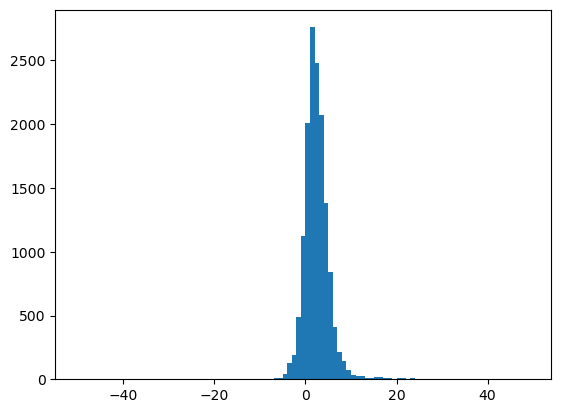

In [19]:
import matplotlib.pyplot as plt 
plt.hist(Ch0ch1_time_diff, range(-50,50))

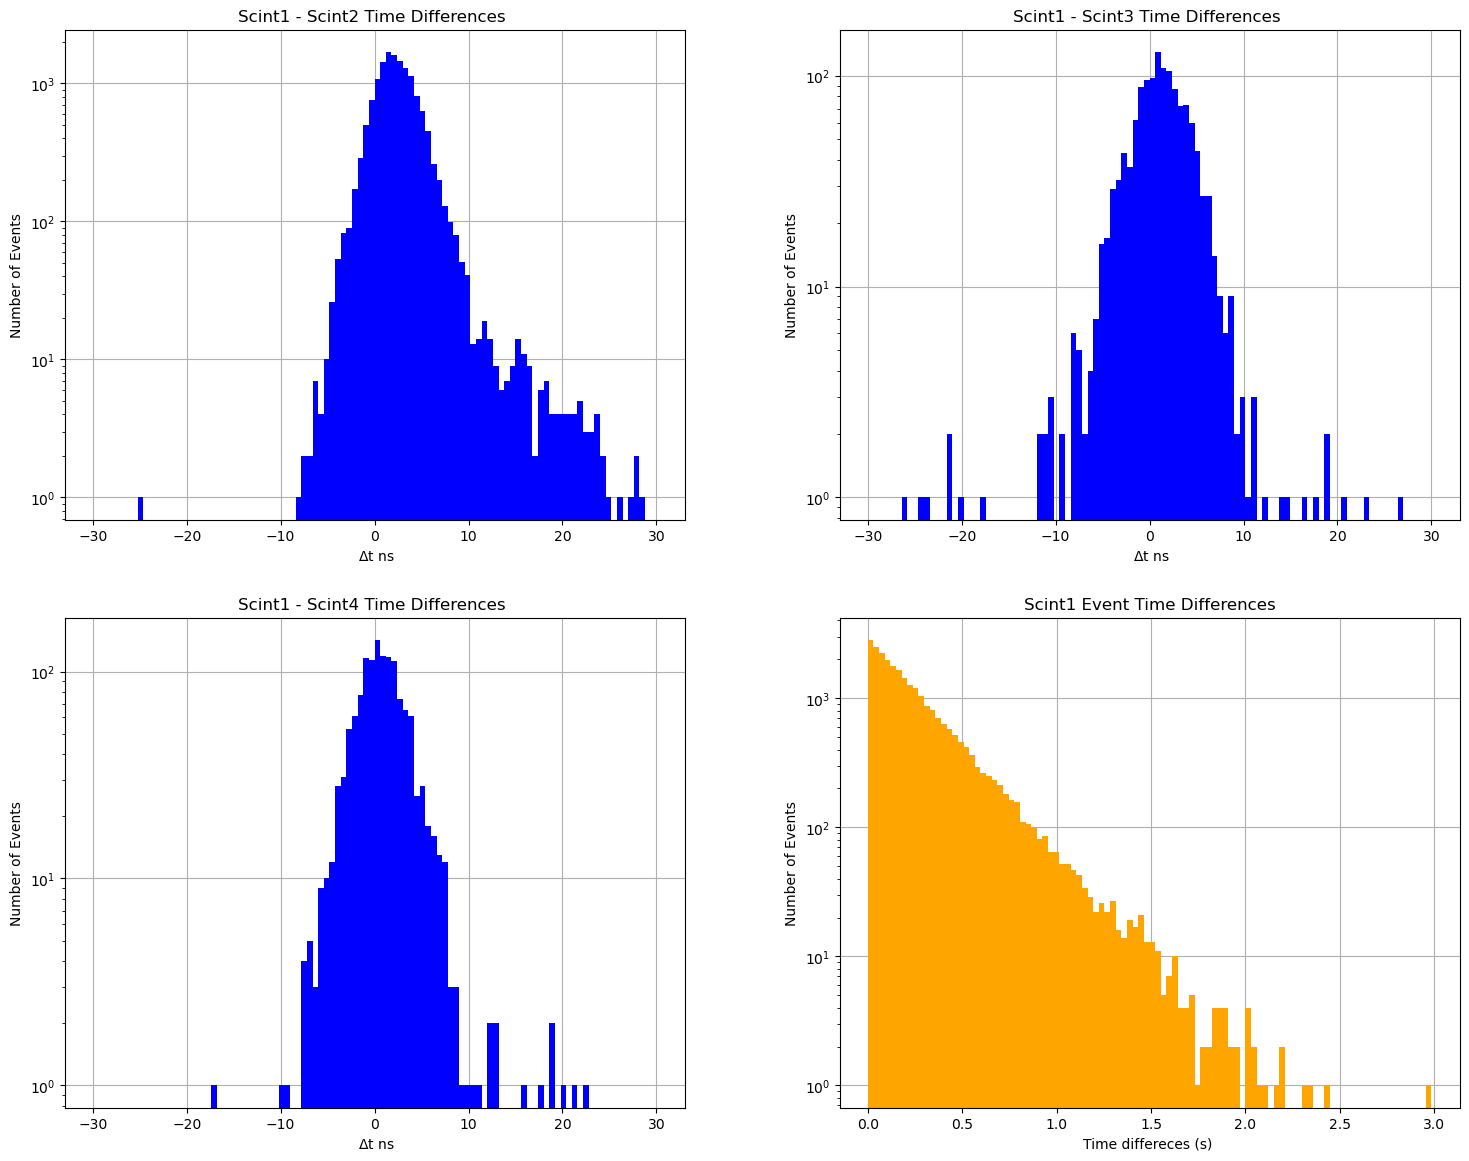

In [51]:
#Create plots
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2, 2,figsize=(18,14))
#fig.supylabel('Number of Events')
#plt.figure(fig.number)
plt.subplots_adjust(wspace=0.25)

#Settings
show_grid = True
bin_num = 100 
range_down = -30
range_up= 30
x_label = " $\Delta$t ns"
y_label = 'Number of Events'

#Add grid
ax0.grid(show_grid)
ax0.set_axisbelow(True)
ax1.grid(show_grid)
ax1.set_axisbelow(True)
ax2.grid(show_grid)
ax2.set_axisbelow(True)
ax3.grid(show_grid)
ax3.set_axisbelow(True)


# Plot time differeces between ch0 and ch1 
plt.sca(ax0)
ax0.set_title("Scint1 - Scint2 Time Differences ")
ax0.set_xlabel(x_label)
ax0.set_ylabel(y_label)
ax0.hist(Ch0ch1_time_diff, bins = bin_num, range=(range_down,range_up), histtype='stepfilled' , color ='blue')
plt.yscale('log')

# Plot time differeces between ch0 and ch2 
plt.sca(ax1)
ax1.set_title("Scint1 - Scint3 Time Differences ")
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.hist(Ch0ch2_time_diff, bins = bin_num, range=(range_down,range_up),histtype='stepfilled' , color ='blue')
plt.yscale('log')

# Plot time differeces between ch0 and ch3 
plt.sca(ax2)
ax2.set_title("Scint1 - Scint4 Time Differences ")
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label)
ax2.hist(Ch0ch3_time_diff, bins = bin_num, range=(range_down,range_up) , color ='blue')
plt.yscale('log')


#Plot time difference in chan 0
plt.sca(ax3)
ax3.set_title("Scint1 Event Time Differences")
ax3.set_xlabel("Time differeces (s) ")
ax3.set_ylabel(y_label)
ax3.hist(CH0_time_diff, bins = bin_num,histtype='stepfilled' , color ='orange')
plt.yscale('log')


plt.show()


Expo function coefficients:
[ 8.00081096 -3.80463529]
Covariance of coefficients:
[[ 8.48383092e-06 -3.23466825e-05]
 [-3.23466825e-05  2.45080222e-04]]


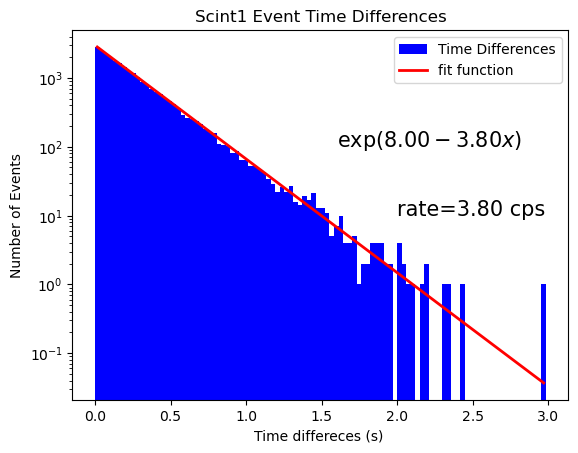

In [81]:
# now I am going to try and fit the time differences plot 

import numpy as np
from scipy.optimize import curve_fit
#firts I define the exponential fucntion that I will be fitting 
def expo(x, a, b):
    return  np.exp(a+(b*x))

#here I caculate the bin centers for the fit               
def bincenters(bins):
    return (bins[1:] + bins[:-1]) / 2
                   
# define the histogram that I will be fitting to and return the bin contents and the bid edeges    
bin_cont, bin_edges, patches = plt.hist(CH0_time_diff, bins = bin_num,histtype='stepfilled' , color ='blue',label ="Time Differences")
                   
# here I do the fit a return the fit values     
param, param_cov = curve_fit(expo, bincenters(bin_edges),bin_cont)
                   
# print the values     
print("Expo function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

# now I also want to draw the fitted function on top of the histogram 
fit_func= expo(bincenters(bin_edges),param[0] ,param[1] )
plt.plot(bincenters(bin_edges), fit_func, 'red', linewidth=2, label ="fit function ")       

fit_eq= r"exp$({:.2f} {:.2f}x)$".format(param[0] ,param[1])

ax=plt.gca()
ax.text(1.6, 100, fit_eq, fontsize=15)
ax.text(2, 10, "rate={:.2f} cps".format(abs(param[1])), fontsize=15)

plt.legend()
plt.yscale('log')
ax.set_title("Scint1 Event Time Differences")
ax.set_xlabel("Time differeces (s) ")
ax.set_ylabel(y_label)
plt.show()
                   

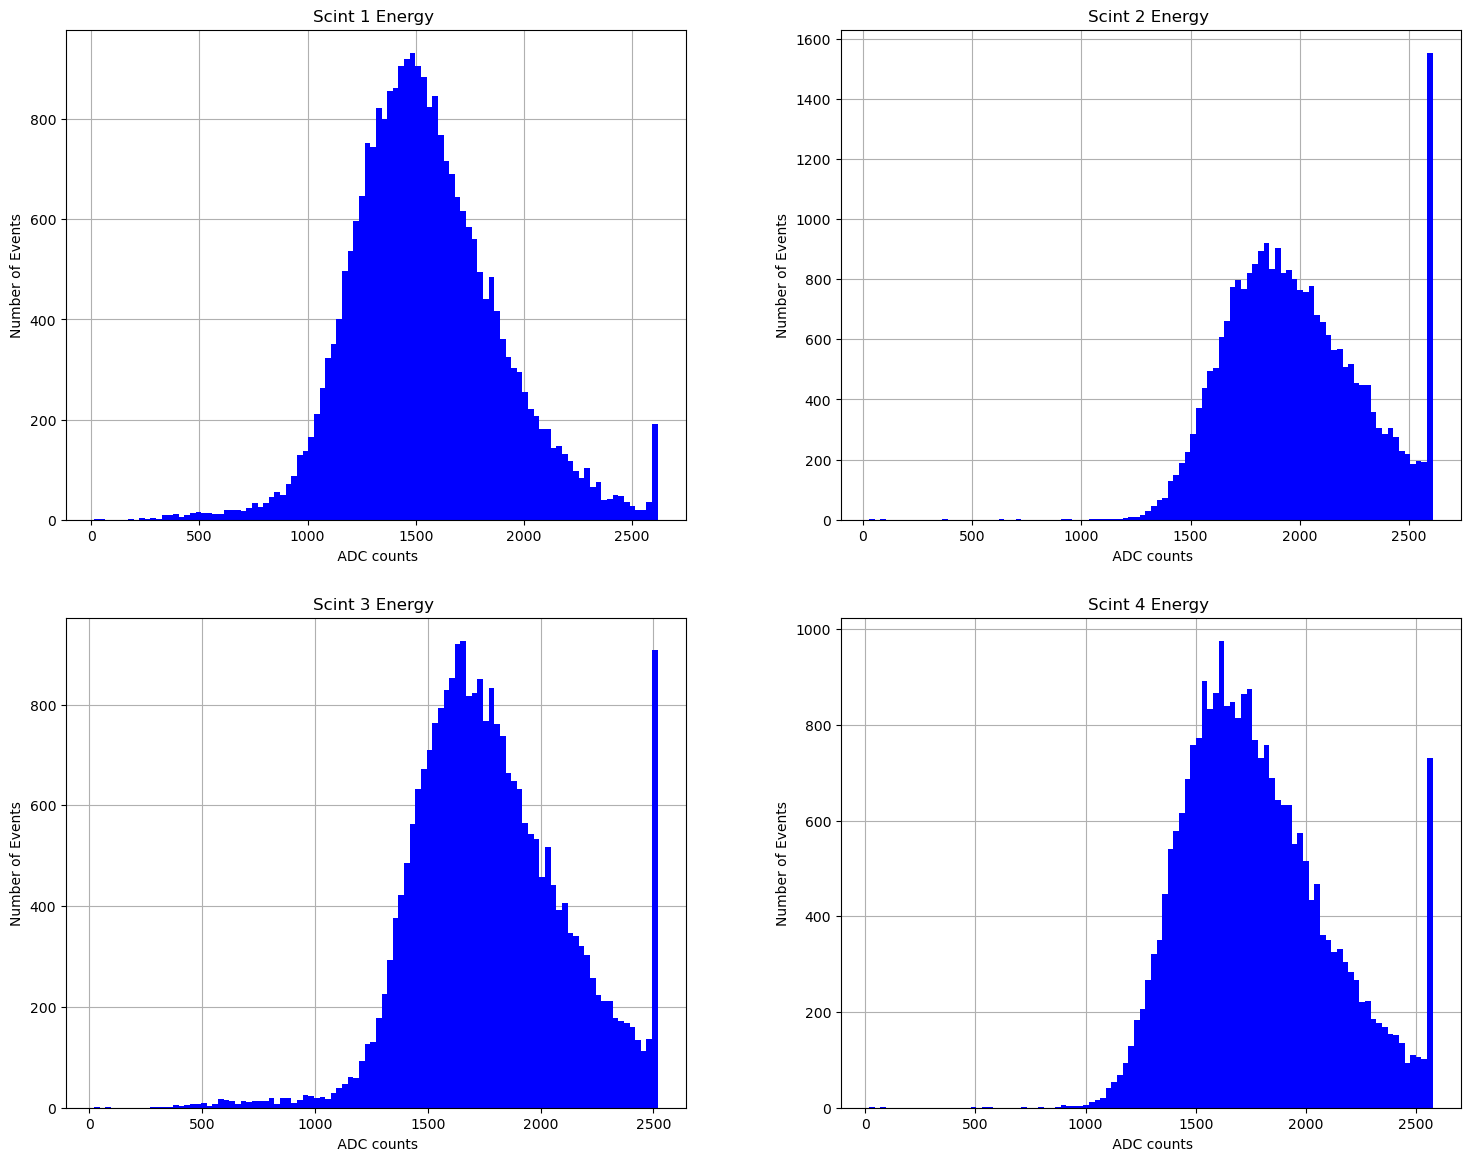

In [21]:
#Create energy plots
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2, 2,figsize=(18,14))
#fig.supylabel('Number of Events')
plt.figure(fig.number)
plt.subplots_adjust(wspace=0.25)

#Settings
show_grid = True
bin_num = 100 
range_down = -30
range_up= 30
x_label = " ADC counts"
y_label = 'Number of Events'


#Add grid
ax0.grid(show_grid)
ax0.set_axisbelow(True)
ax1.grid(show_grid)
ax1.set_axisbelow(True)
ax2.grid(show_grid)
ax2.set_axisbelow(True)
ax3.grid(show_grid)
ax3.set_axisbelow(True)


# Plot ch0 energy 
plt.sca(ax0)
ax0.set_title("Scint 1 Energy ")
ax0.set_xlabel(x_label)
ax0.set_ylabel(y_label)
ax0.hist(CH0_energy, bins = bin_num, histtype='stepfilled' , color ='blue')
#plt.yscale('log')


# Plot ch1 energy 
plt.sca(ax1)
ax1.set_title("Scint 2 Energy ")
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.hist(CH1_energy, bins = bin_num, histtype='stepfilled' , color ='blue')
#plt.yscale('log')


# Plot ch2 energy 
plt.sca(ax2)
ax2.set_title("Scint 3 Energy ")
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label)
ax2.hist(CH2_energy, bins = bin_num, histtype='stepfilled' , color ='blue')
#plt.yscale('log')


# Plot ch3 energy
ax3.set_title("Scint 4 Energy ")
ax3.set_xlabel(x_label)
ax3.set_ylabel(y_label)
ax3.hist(CH3_energy, bins = bin_num, histtype='stepfilled' , color ='blue')
#plt.yscale('log')

plt.show()

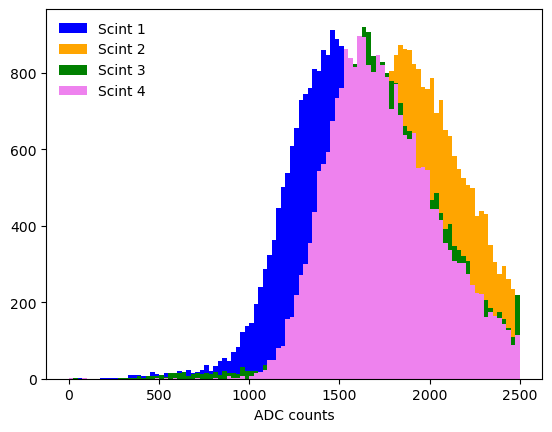

In [22]:
# creat one histogram with all the energy plots to compare with Adam 
import matplotlib.pyplot as plt 
plt.hist(CH0_energy, bins = bin_num, range=(0,2500),histtype='stepfilled' , color ='blue', label='Scint 1')
plt.hist(CH1_energy, bins = bin_num, range=(0,2500),histtype='stepfilled' , color ='orange', label='Scint 2')
plt.hist(CH2_energy, bins = bin_num, range=(0,2500),histtype='stepfilled' , color ='green', label='Scint 3')
plt.hist(CH3_energy, bins = bin_num, range=(0,2500),histtype='stepfilled' , color ='violet', label='Scint 4')
ax = plt.gca()
ax.set_xlabel("ADC counts")
plt.legend(loc='best', frameon=False)

In [23]:
# caculate the event rate for chan 0 
# first convert the time stamps to seconds 
CH0_timestamps=CH0_timestamps/1e+12
CH0_timestamps

array([1.25717609e-01, 3.33829425e-01, 3.77438784e-01, ...,
       6.83071767e+03, 6.83084413e+03, 6.83108137e+03])

In [24]:
rate=np.floor(CH0_timestamps)
rate


array([   0.,    0.,    0., ..., 6830., 6830., 6831.])

In [25]:
import ROOT
from ROOT import gStyle
from ROOT import gPad
gStyle.SetOptStat(0)



Welcome to JupyROOT 6.28/00


6784.488168272645 6668
1.017469731294638 0.15656741827482273

****************************************
Minimizer is Linear / Migrad
Chi2                      =      6784.49
NDf                       =         6668
p0                        =      2.90816   +/-   0.0208823   


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


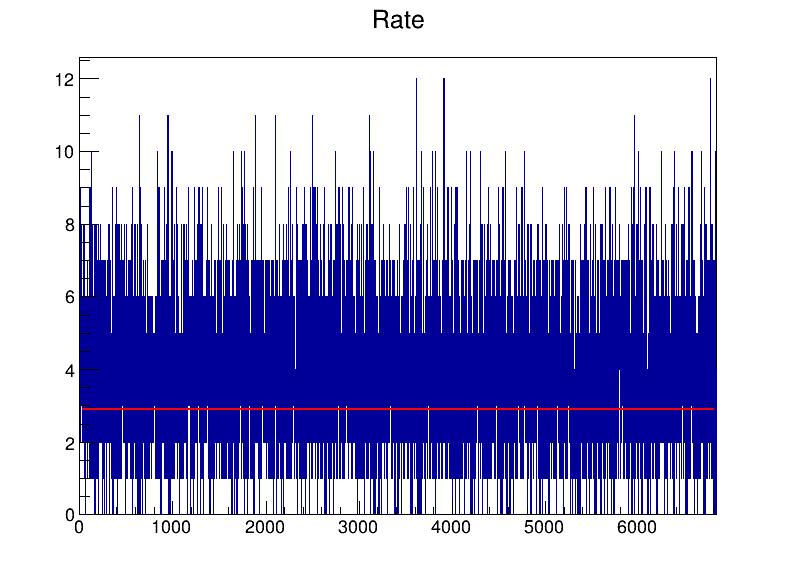

In [47]:
hist=ROOT.TH1D("h1", "Rate", 6833, 0, 6831)
for xeach in rate:
    hist.Fill(xeach)
    
# Fit histogram with root #
hist.Fit('pol0')

# Get Root Fit and Goodness of Fit Parameters #
f = hist.GetFunction('pol0')
const = f.GetParameter(0)
econst= f.GetParError(0)
ndf,chi2,prob = f.GetNDF(),f.GetChisquare(),f.GetProb()

print(chi2, ndf)
print(chi2/ndf,prob)
    
c1 = ROOT.TCanvas("c0"," ",800,600)
hist.Draw()
c1.Draw()


Text(0.5, 0, 'Seconds from the begining of the run')

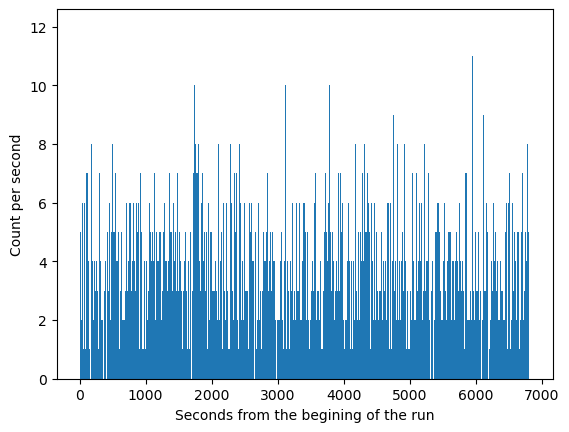

In [49]:
import matplotlib.pyplot as plt 
bin_contents, bin_edges, patches =plt.hist(rate,bins = 6831)
#bin_contents, bin_edges, patches =plt.hist(rate, bins = 6832,range=(0,6831))
#bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
ax = plt.gca()
ax.set_ylabel("Count per second")
ax.set_xlabel("Seconds from the begining of the run")

In [46]:
np.mean(bin_contents)

3.8325281803542675

In [45]:
bin_edges

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 6.829e+03, 6.830e+03,
       6.831e+03])

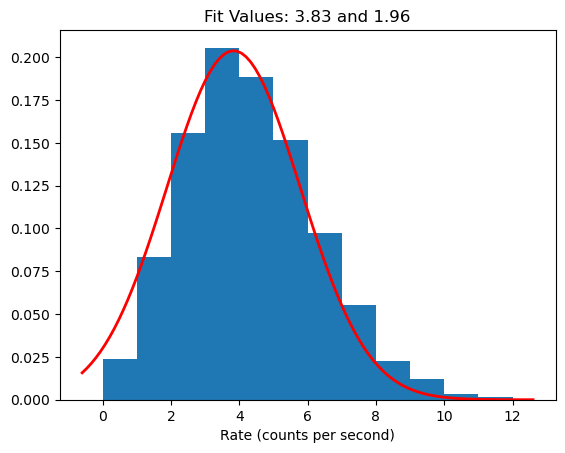

In [50]:
import matplotlib.pyplot as plt 
from scipy.stats import norm

plt.hist(bin_contents, density=True,bins =12,range=(0,12))

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(bin_contents) 

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
 
plt.plot(x, p, 'red', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
ax = plt.gca()
ax.set_xlabel("Rate (counts per second)")
 
plt.show()